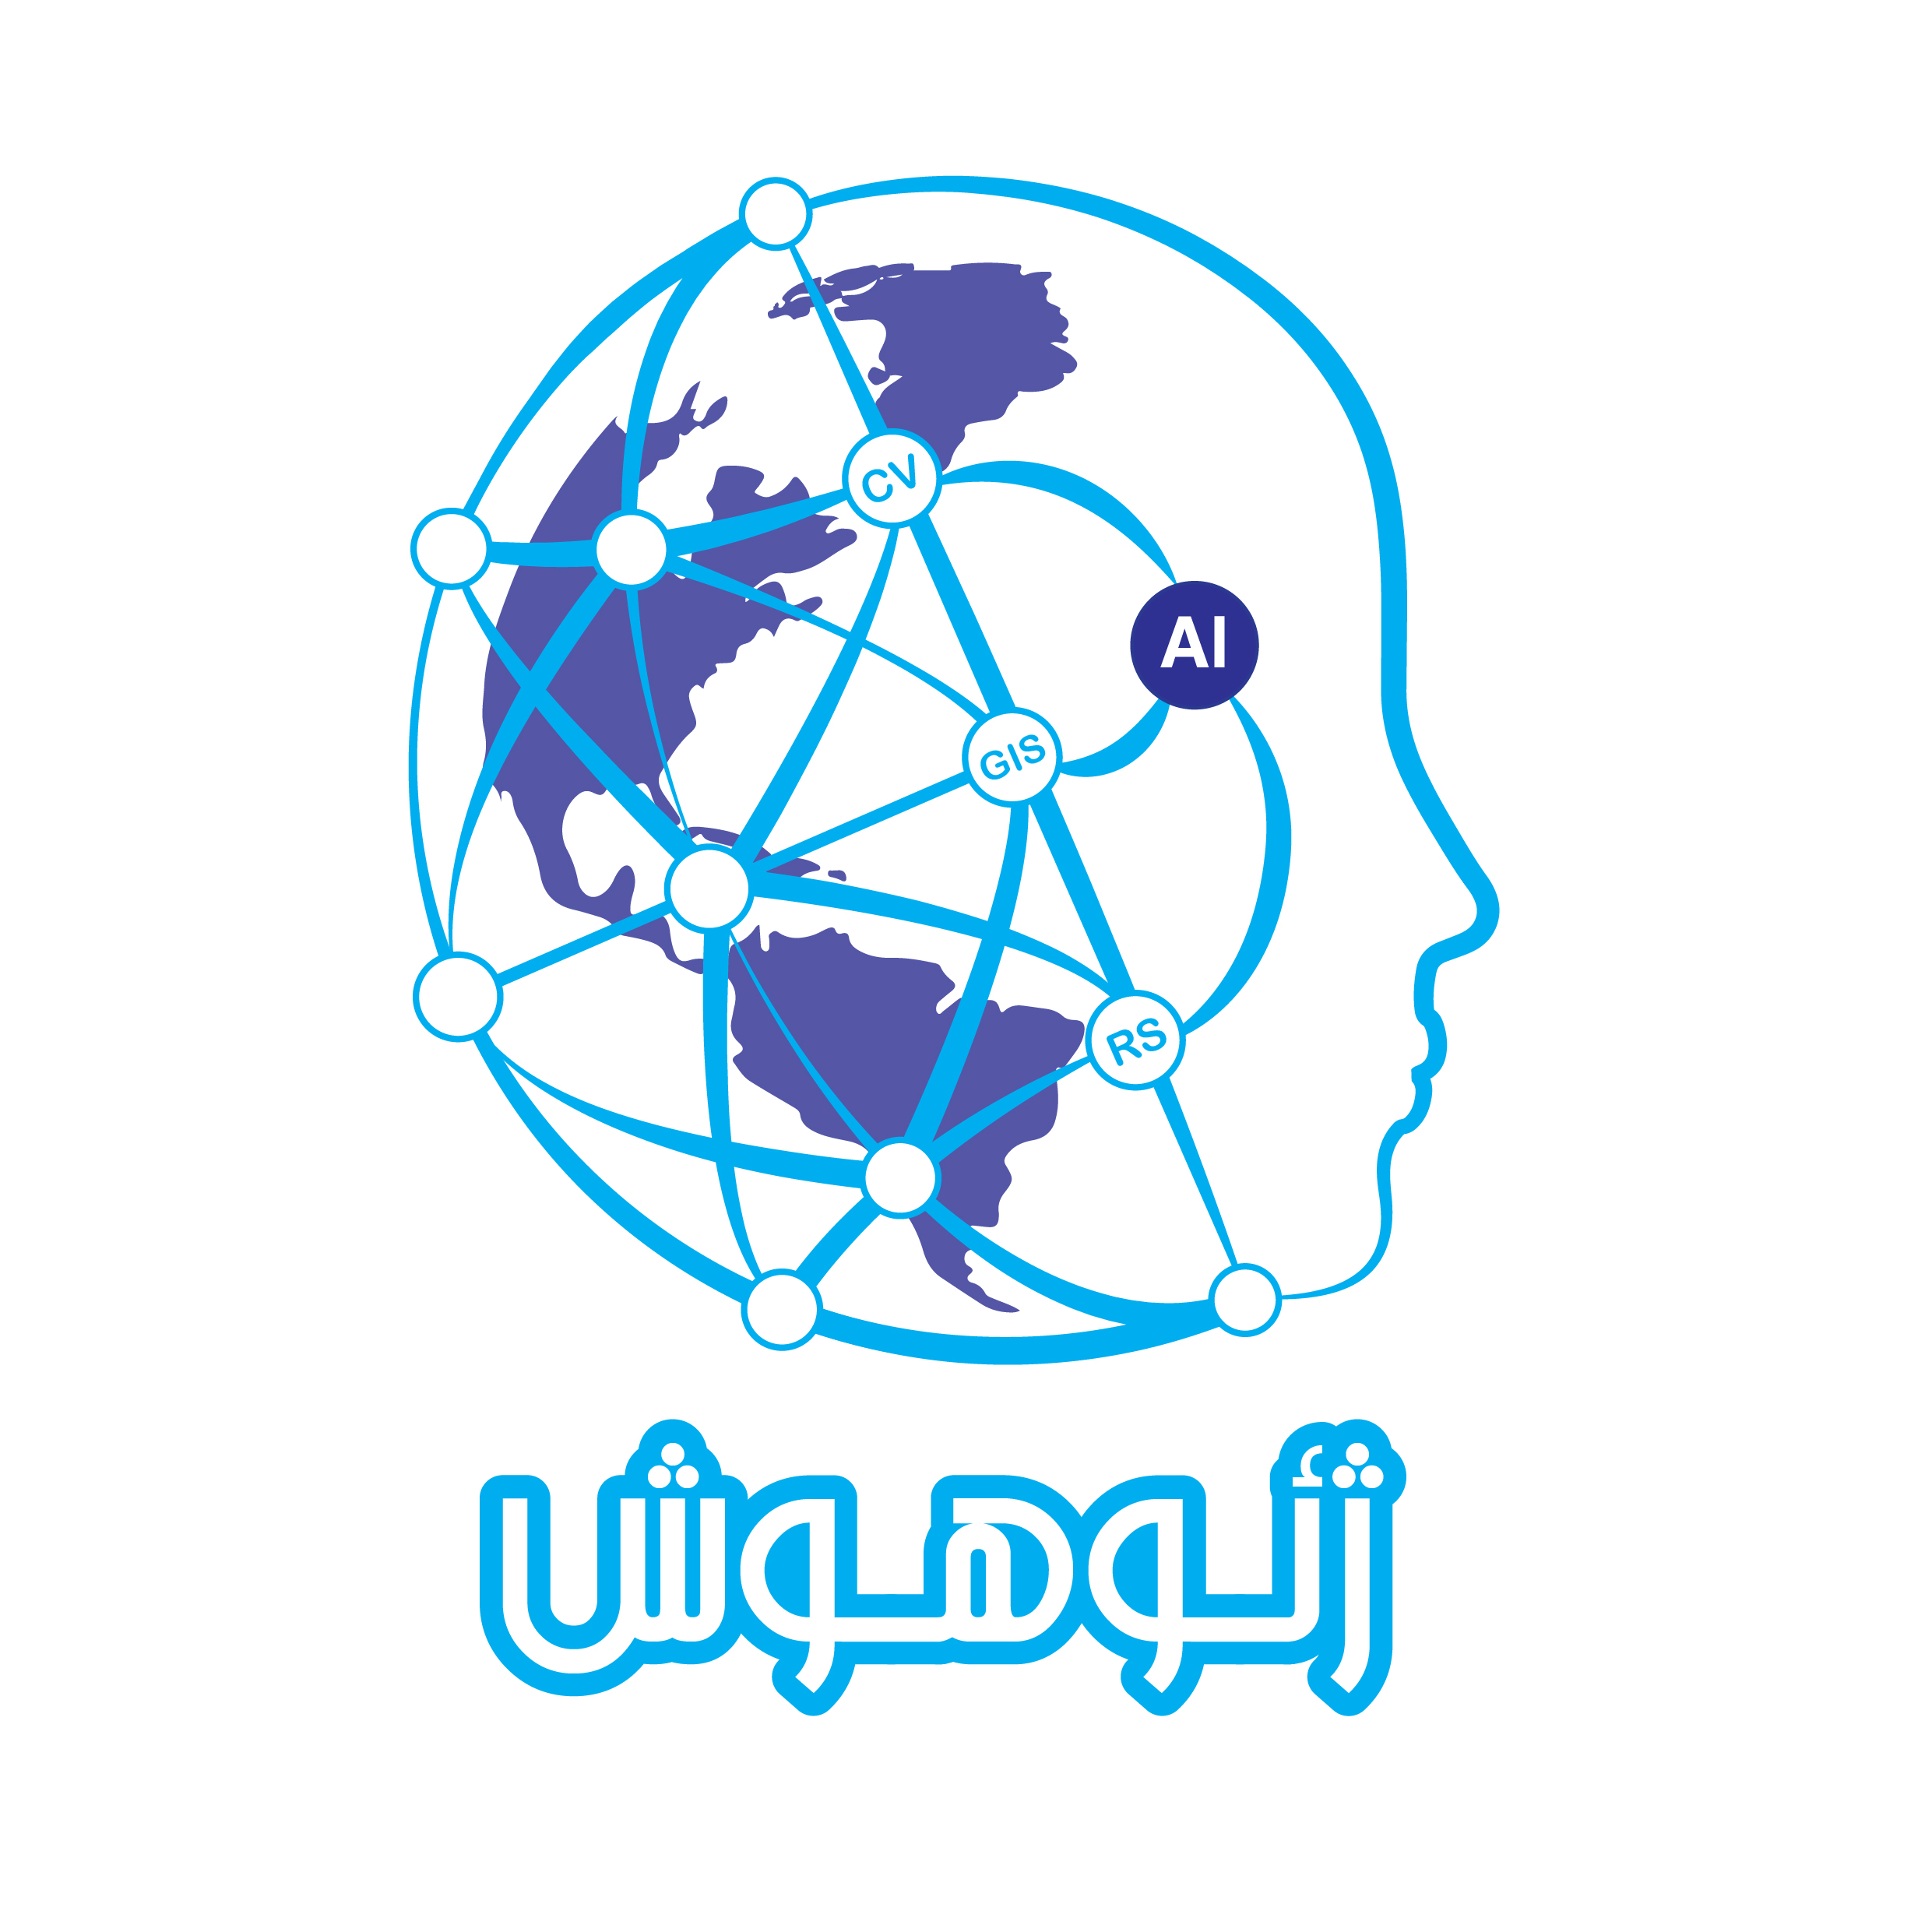

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
x = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [6]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
x = x.values
y = y.values

In [10]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

## Encoding categorical Data

### Label Encoding for 'Gender' Column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
le.fit_transform(x[:,2])

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
x[:, 2] = le.fit_transform(x[:,2])

In [17]:
x

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

### One hot encoding for 'Geography' column

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [32]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(), [1])], remainder = 'passthrough')

In [33]:
ct.fit_transform(x)

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [84]:
ct.fit_transform(x)[0]

array([1.0, 0.0, 1.0, 1.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [38]:
x = ct.fit_transform(x)

In [88]:
x[0]

array([1.0, 0.0, 1.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

### Splitting the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
len(X_train)

8000

In [106]:
len(y_train)

8000

### Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
sc = StandardScaler()

In [114]:
X_train

array([[ 0.5698444 , -0.5698444 , -1.01460667, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.75486502,  1.75486502, -1.01460667, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.5698444 , -0.5698444 ,  0.98560362, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.5698444 , -0.5698444 ,  0.98560362, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [ 0.5698444 , -0.5698444 , -1.01460667, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.75486502,  1.75486502, -1.01460667, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [112]:
X_train = sc.fit_transform(X_train)

In [113]:
X_test = sc.transform(X_test)

### Building the ANN

In [65]:
ann = tf.keras.models.Sequential()

In [68]:
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [70]:
ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))

In [71]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [73]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 3s 4ms/step - loss: 0.5321 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4707 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4429 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4305 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4264 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4239 - accuracy: 0.8119
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4215 - accuracy: 0.8195
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4195 - accura

In [75]:
32*250 

8000

### Test

In [125]:
asghar = [1,0,0, 1, 600, 1, 40, 3, 60000, 2, 1,1, 50000]

In [126]:
sc.transform([asghar])

array([[ 1.00000000e+00, -3.63181707e-16,  2.99649194e-16,
         1.00000000e+00,  6.00000000e+02,  1.00000000e+00,
         4.00000000e+01,  3.00000000e+00,  6.00000000e+04,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         5.00000000e+04]])

In [127]:
asghar = sc.transform([asghar])

In [128]:
ann.predict(asghar)

1/1 [==============================] - 0s 94ms/step


array([[0.012665]], dtype=float32)

In [129]:
print(ann.predict(asghar) > 0.5)

1/1 [==============================] - 0s 25ms/step
[[False]]


### Predicting the test sre result

In [153]:
y_pred = ann.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [154]:
y_pred

array([[0.24526785],
       [0.38684592],
       [0.13595265],
       ...,
       [0.1588144 ],
       [0.26076478],
       [0.2470226 ]], dtype=float32)

In [155]:
y_pred = (y_pred > 0.5)

In [156]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [157]:
y_pred.shape

(2000, 1)

In [161]:
y_test.shape

(2000,)

In [163]:
np.concatenate((y_pred.reshape(2000,1), y_test.reshape(2000,1)), 1)

array([[0, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [164]:
np.concatenate((y_pred.reshape(2000,1), y_test.reshape(2000,1)), 1)[20:50]

array([[1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [171]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [169]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
test = np.concatenate((y_pred.reshape(2000,1), y_test.reshape(2000,1)), 1)
np.mean(np.abs(test[:,0] - test[:,1]))

63/63 [==============================] - 0s 1ms/step


0.1335

In [168]:
print(confusion_matrix(y_test, y_pred))

[[1512   83]
 [ 184  221]]


In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.55      0.62       405

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [172]:
accuracy_score(y_test, y_pred)

0.8665